In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set()

In [6]:
df = pd.read_csv('Big market sales data.csv')

In [4]:
df.columns, df.shape

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'), (8523, 12))

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [16]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
for i in df.dtypes[df.dtypes == 'object'].index:
    print(i, ':-', df[i].nunique())

Item_Identifier :- 1559
Item_Fat_Content :- 2
Item_Type :- 16
Outlet_Identifier :- 10
Outlet_Size :- 3
Outlet_Location_Type :- 3
Outlet_Type :- 4


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Store_running_from           8523 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 632.6+ KB


## Univariate analysis

#### 1. Item_Identifier

In [19]:
print(df['Item_Identifier'].unique())
print(df['Item_Identifier'].nunique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559


In [11]:
df['Item_Identifier'].value_counts().sort_values(ascending = False)

FDG33    10
FDW13    10
FDF52     9
FDP25     9
FDQ40     9
         ..
DRF48     1
FDO33     1
FDY43     1
FDQ60     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

#### 2.Item_Fat_Content

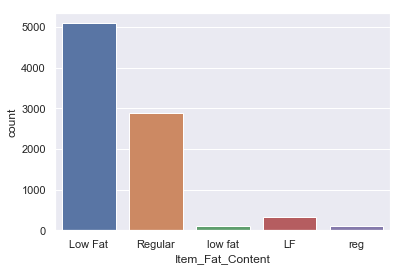

In [24]:
sns.countplot(df['Item_Fat_Content'])

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [43]:
for i in set(df['Item_Identifier']):
    if df[df['Item_Identifier'] == i]['Item_Fat_Content'].nunique() > 1:
        print(i, df[df['Item_Identifier'] == i]['Item_Fat_Content'].unique())

FDO50 ['LF' 'low fat' 'Low Fat']
FDH57 ['Low Fat' 'LF']
FDA04 ['Regular' 'reg']
FDE35 ['Regular' 'reg']
FDZ48 ['LF' 'low fat' 'Low Fat']
FDN21 ['LF' 'Low Fat']
FDU19 ['Regular' 'reg']
FDT36 ['Low Fat' 'LF']
FDD38 ['Regular' 'reg']
FDW08 ['LF' 'Low Fat']
FDX39 ['Regular' 'reg']
FDZ26 ['Regular' 'reg']
FDB60 ['Low Fat' 'low fat']
FDR44 ['Regular' 'reg']
FDD32 ['Regular' 'reg']
FDA23 ['Low Fat' 'LF']
FDO24 ['Low Fat' 'low fat']
FDD36 ['Low Fat' 'LF']
FDH05 ['Regular' 'reg']
FDL38 ['Regular' 'reg']
FDI14 ['LF' 'Low Fat']
NCI18 ['Low Fat' 'LF']
NCW54 ['Low Fat' 'low fat']
DRK12 ['Low Fat' 'LF']
NCM29 ['Low Fat' 'LF']
FDJ41 ['Low Fat' 'LF']
FDX01 ['LF' 'Low Fat']
NCC18 ['Low Fat' 'LF']
DRE13 ['Low Fat' 'low fat']
FDP09 ['Low Fat' 'LF' 'low fat']
DRD12 ['Low Fat' 'LF']
NCB19 ['Low Fat' 'LF']
NCQ50 ['Low Fat' 'LF']
FDB57 ['Regular' 'reg']
NCW42 ['LF' 'Low Fat']
FDQ13 ['LF' 'Low Fat']
FDU56 ['Low Fat' 'LF']
NCI17 ['Low Fat' 'low fat']
DRH59 ['low fat' 'Low Fat' 'LF']
FDG35 ['Regular' 'reg']
FDU

FDW13 ['Low Fat' 'low fat']
FDN12 ['LF' 'Low Fat']
DRF37 ['Low Fat' 'low fat']
FDH60 ['Regular' 'reg']
NCM18 ['Low Fat' 'LF']
FDX10 ['Regular' 'reg']
NCF30 ['Low Fat' 'LF']
FDJ09 ['Low Fat' 'low fat']
FDQ21 ['Low Fat' 'low fat']
FDC29 ['Regular' 'reg']
FDW24 ['Low Fat' 'low fat']
FDD35 ['Low Fat' 'LF']
DRJ59 ['low fat' 'Low Fat']
NCD06 ['Low Fat' 'low fat']
FDW49 ['Low Fat' 'LF']
FDQ19 ['Regular' 'reg']
NCO55 ['Low Fat' 'LF']
NCT05 ['Low Fat' 'LF']
NCQ05 ['LF' 'Low Fat']
FDW36 ['Low Fat' 'LF']
NCM26 ['LF' 'Low Fat']
DRG36 ['low fat' 'Low Fat' 'LF']
FDW04 ['Regular' 'reg']
DRK11 ['Low Fat' 'low fat']
NCP06 ['Low Fat' 'LF']
FDI44 ['Low Fat' 'LF']
FDM12 ['reg' 'Regular']
FDY11 ['Regular' 'reg']
NCM54 ['Low Fat' 'LF']
NCJ31 ['Low Fat' 'LF']
FDR47 ['LF' 'Low Fat']
NCE42 ['Low Fat' 'low fat']
DRK59 ['LF' 'Low Fat' 'low fat']
FDW12 ['Regular' 'reg']
DRF01 ['Low Fat' 'LF']
NCX53 ['LF' 'Low Fat']
FDO60 ['LF' 'Low Fat']
NCQ06 ['Low Fat' 'LF']
DRJ01 ['Low Fat' 'low fat']
NCT53 ['low fat' 'Low Fat

#### Same item can't bi diff - diff fat type it looks like data entry mistake problem

In [3]:
df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)

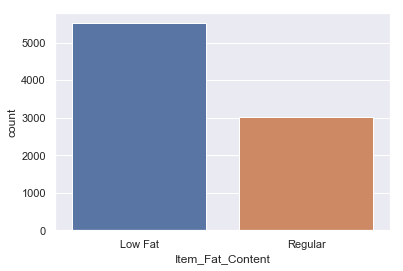

In [4]:
sns.countplot(df['Item_Fat_Content'])

#### 3.Item_Type

In [30]:
df['Item_Type'].nunique()

16

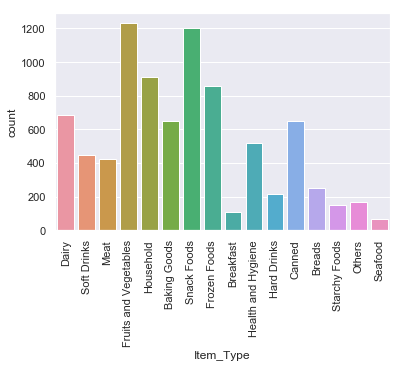

In [29]:
plt.xticks(rotation = 90)
sns.countplot(df['Item_Type'])

#### 4. Outlet_Identifier

In [37]:
df['Outlet_Identifier'].nunique()

10

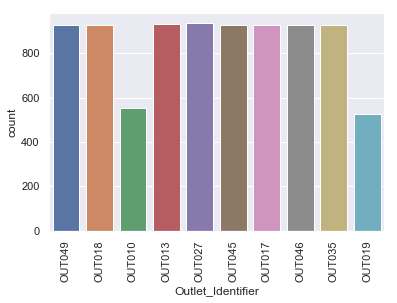

In [42]:
plt.xticks(rotation = 90)
sns.countplot(df['Outlet_Identifier'])

In [43]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

#### 5.Outlet_Establishment_Year

In [8]:
for i in df[ 'Outlet_Identifier'].unique():
    print(i, df[df['Outlet_Identifier'] == i]['Outlet_Establishment_Year'].unique())

OUT049 [1999]
OUT018 [2009]
OUT010 [1998]
OUT013 [1987]
OUT027 [1985]
OUT045 [2002]
OUT017 [2007]
OUT046 [1997]
OUT035 [2004]
OUT019 [1985]


In [9]:
df[ 'Outlet_Identifier'].nunique()

10

#### 6. Outlet Type

In [13]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### 7. Outlet_Size

In [15]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### 8.Outlet_Location_Type

In [16]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

#### 9. Item_Outlet_Sale

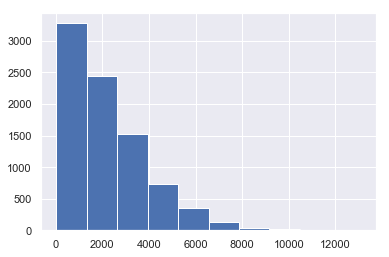

In [21]:
ax = plt.hist(df['Item_Outlet_Sales'])

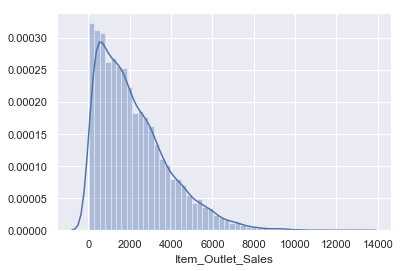

In [18]:
sns.distplot(df['Item_Outlet_Sales'])

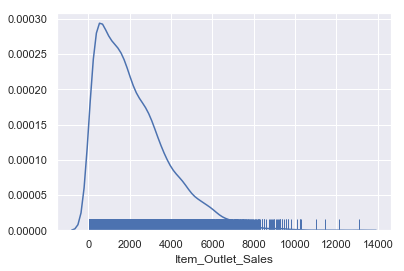

In [25]:
sns.distplot(df['Item_Outlet_Sales'], rug = True, hist = False)

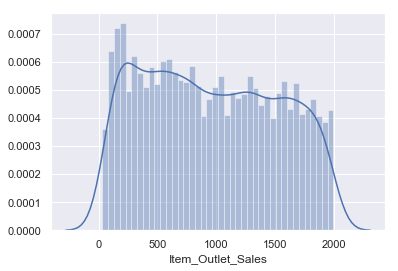

In [28]:
sns.distplot(df[df['Item_Outlet_Sales']<2000]['Item_Outlet_Sales'], bins = 40)

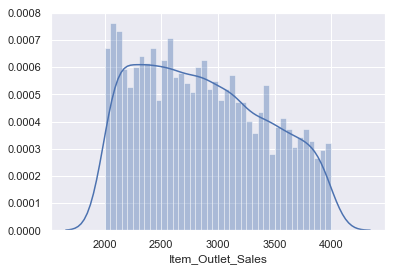

In [29]:
sns.distplot(df[(df['Item_Outlet_Sales']>2000) & (df['Item_Outlet_Sales']< 4000) ]['Item_Outlet_Sales'], bins = 40)

#### 11. Item_mrp

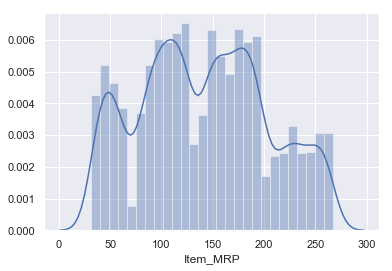

In [23]:
sns.distplot(df['Item_MRP'])

### Handle missing values:-

In [63]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
df.corr()['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

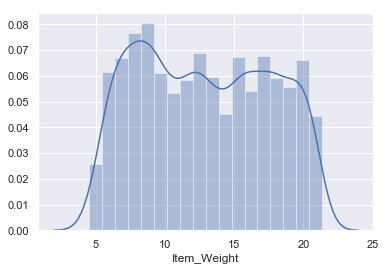

In [36]:
sns.distplot(df.dropna()['Item_Weight'])

### Item_weight has almost normal dist. so replace na by mean

In [5]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

### Missing valu in Outlet_Size

In [76]:
df.loc[df['Outlet_Size'][df['Outlet_Size'].isna()].index]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [85]:
df[df['Outlet_Identifier'] == 'OUT010'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [83]:
df[df['Outlet_Location_Type'] == 'Tier 3']['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [84]:
df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [87]:
df[df['Outlet_Identifier'] == 'OUT045'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028


In [91]:
df[(df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Type'] == 'Supermarket Type1')]['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [92]:
df[(df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Type'] == 'Supermarket Type1')]['Outlet_Identifier'].unique()

array(['OUT045', 'OUT017', 'OUT035'], dtype=object)

In [93]:
df[df['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [94]:
df[df['Outlet_Type'] == 'Supermarket Type1']['Outlet_Location_Type'].value_counts()

Tier 2    2785
Tier 1    1860
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

### Max supermarket-1 has small size in all location and in tier2 also all outlet has small size

In [6]:
df.loc[df[df['Outlet_Identifier'] == 'OUT045'].index, 'Outlet_Size'] = 'Small'

In [88]:
df[df['Outlet_Identifier'] == 'OUT017'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.535
25,NCD06,13.0,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.908


In [7]:
df.loc[df[df['Outlet_Identifier'] == 'OUT017'].index, 'Outlet_Size'] = 'Small'

In [97]:
df[df['Outlet_Identifier'] == 'OUT010'].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [100]:
df[(df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Grocery Store')]['Outlet_Identifier'].unique()

array(['OUT010'], dtype=object)

#### Mainly outlet size is depends upon city or location type or this type of outlet in which size opened in diff location

In [101]:
df[(df['Outlet_Location_Type'] == 'Tier 3')]['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [102]:
df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [103]:
df[df['Outlet_Type'] == 'Grocery Store']['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Name: Outlet_Location_Type, dtype: int64

In [104]:
df[(df['Outlet_Location_Type'] == 'Tier 1')]['Outlet_Size'].value_counts()

Small     1458
Medium     930
Name: Outlet_Size, dtype: int64

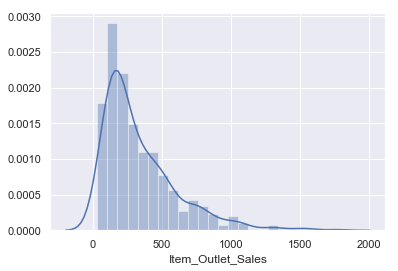

In [106]:
sns.distplot(df[df['Outlet_Identifier'] == 'OUT010']['Item_Outlet_Sales'])

In [108]:
df[df['Item_Outlet_Sales'] <1000]['Outlet_Size'].value_counts()

Small     1265
Medium     487
High       215
Name: Outlet_Size, dtype: int64

### 
Firstly Out10 is in Tier 3 and it is Grosery store in this city there is no any other glosery store and secon point is  
then mainly Grosery stores are small size in which other cities and third point is the sale of this stores is lie below 1000
and in it maximum stores are small sizes so

In [8]:
df.loc[df[df['Outlet_Identifier'] == 'OUT010'].index, 'Outlet_Size'] = 'Small'

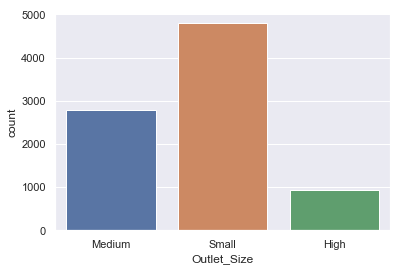

In [9]:
sns.countplot(df['Outlet_Size'])

In [10]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Bivariate analysis

In [11]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


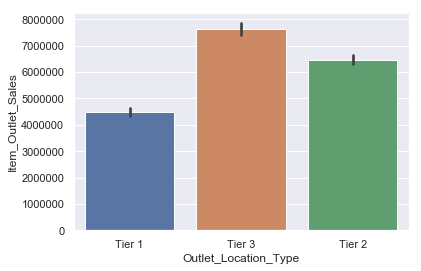

In [13]:
sns.barplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'], estimator = sum)

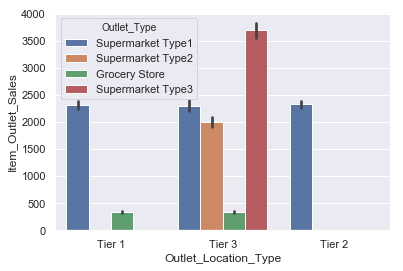

In [25]:
sns.barplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'], hue = df['Outlet_Type'])

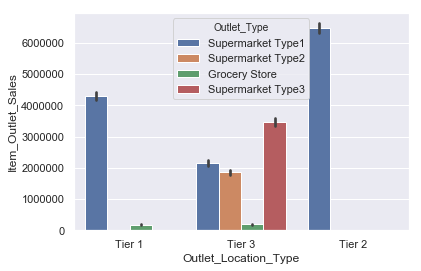

In [14]:
sns.barplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'], hue = df['Outlet_Type'], estimator = sum)

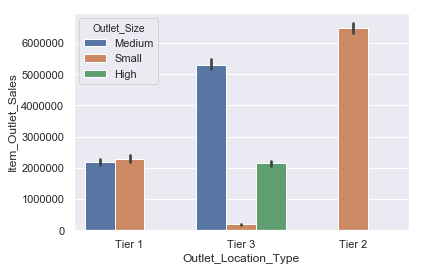

In [16]:
sns.barplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'], hue = df['Outlet_Size'], estimator = sum)

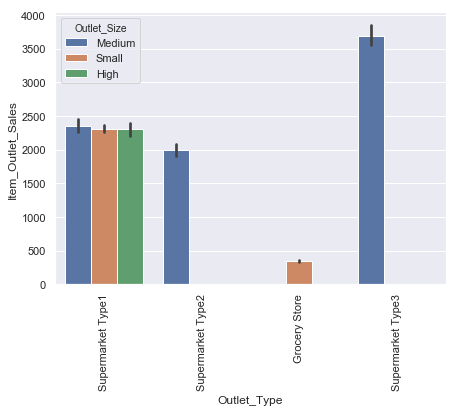

In [33]:
plt.figure(figsize = (7,5))
plt.xticks(rotation = 90)
sns.barplot(df['Outlet_Type'], df['Item_Outlet_Sales'], hue = df['Outlet_Size'])

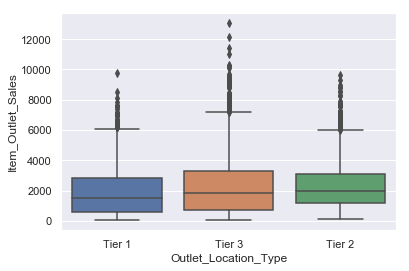

In [18]:
sns.boxplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'])

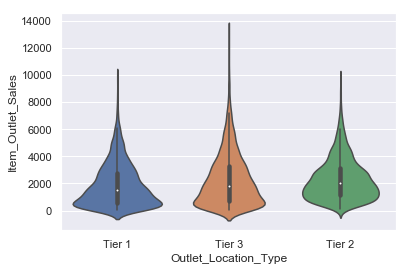

In [19]:
sns.violinplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'])

In [23]:
sns.swarmplot(df['Outlet_Location_Type'], df['Item_Outlet_Sales'])

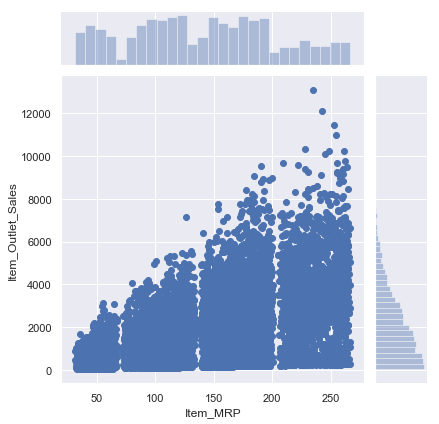

In [27]:
sns.jointplot(df['Item_MRP'], df['Item_Outlet_Sales'])

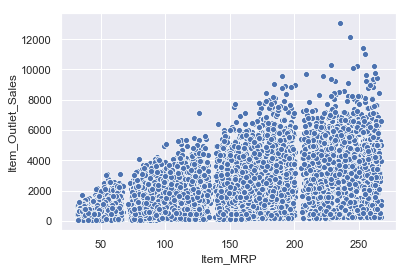

In [28]:
sns.scatterplot(df['Item_MRP'], df['Item_Outlet_Sales'])

In [31]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


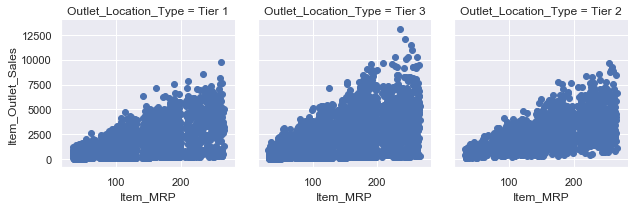

In [32]:
ax = sns.FacetGrid(df, col = 'Outlet_Location_Type')
ax = ax.map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales')

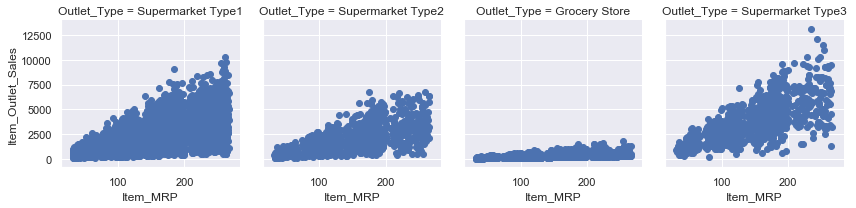

In [33]:
ax = sns.FacetGrid(df, col = 'Outlet_Type')
ax = ax.map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales')

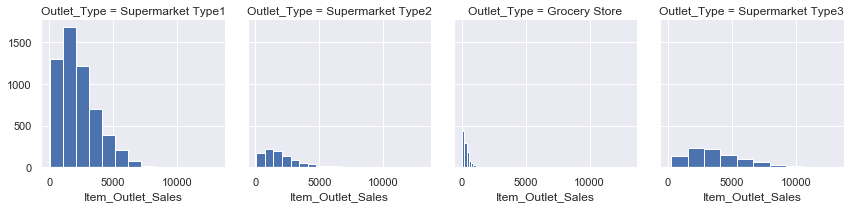

In [12]:
ax = sns.FacetGrid(df, col = 'Outlet_Type')
ax = ax.map(plt.hist, 'Item_Outlet_Sales')

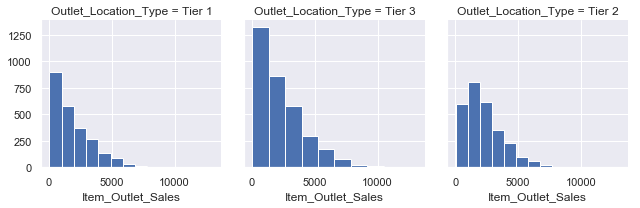

In [13]:
ax = sns.FacetGrid(df, col = 'Outlet_Location_Type')
ax = ax.map(plt.hist, 'Item_Outlet_Sales')

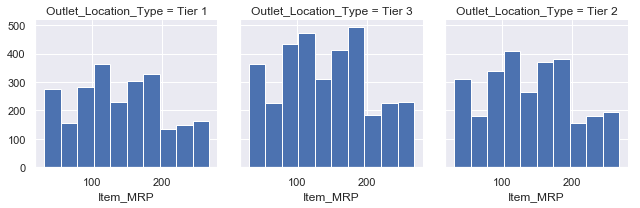

In [15]:
ax = sns.FacetGrid(df, col = 'Outlet_Location_Type')
ax = ax.map(plt.hist, 'Item_MRP')

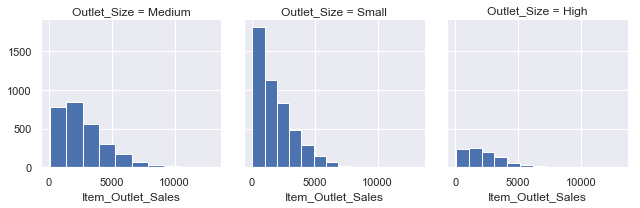

In [14]:
ax = sns.FacetGrid(df, col = 'Outlet_Size')
ax = ax.map(plt.hist, 'Item_Outlet_Sales')

In [16]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum(), df['Outlet_Type'].value_counts()

(Outlet_Type
 Grocery Store        3.680343e+05
 Supermarket Type1    1.291734e+07
 Supermarket Type2    1.851823e+06
 Supermarket Type3    3.453926e+06
 Name: Item_Outlet_Sales, dtype: float64, Supermarket Type1    5577
 Grocery Store        1083
 Supermarket Type3     935
 Supermarket Type2     928
 Name: Outlet_Type, dtype: int64)

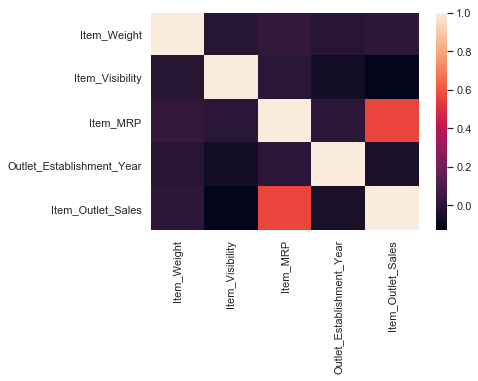

In [17]:
sns.heatmap(df.corr())

In [60]:
df['Store_running_from'] = df['Outlet_Establishment_Year'].map(lambda x : 2013 - x)

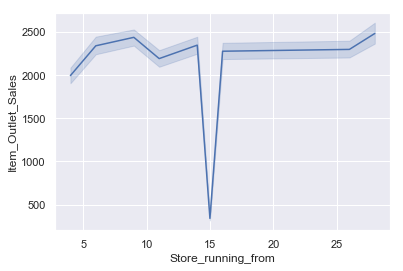

In [21]:
sns.lineplot(df['Store_running_from'], df['Item_Outlet_Sales'])

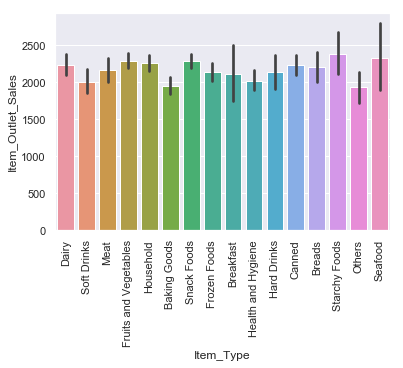

In [24]:
plt.xticks(rotation = 90)
sns.barplot(df['Item_Type'], df['Item_Outlet_Sales'])

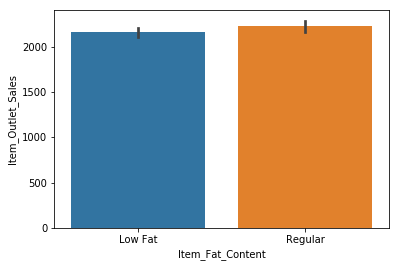

In [65]:
sns.barplot(df['Item_Fat_Content'], df['Item_Outlet_Sales'])

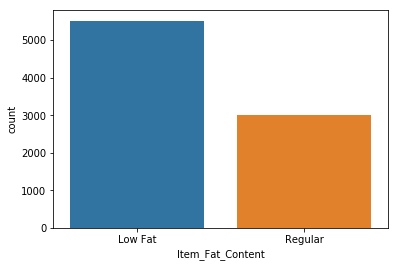

In [66]:
sns.countplot(df['Item_Fat_Content'])

In [9]:
main['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

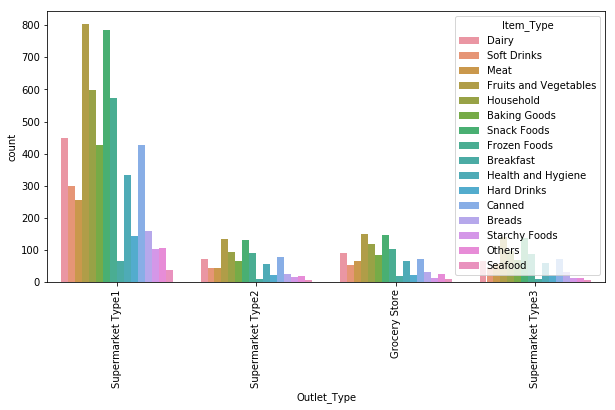

In [12]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.countplot(main['Outlet_Type'], hue = main['Item_Type'])

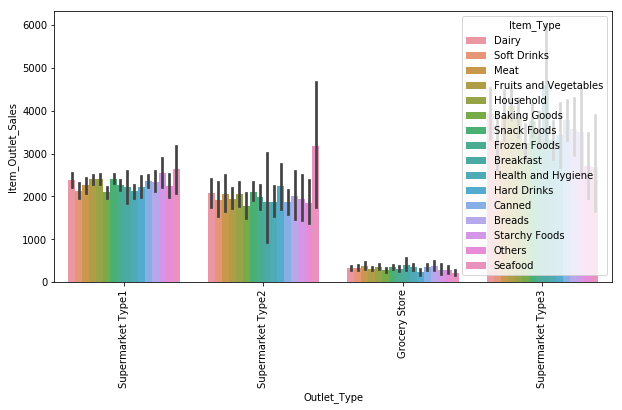

In [13]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.barplot(main['Outlet_Type'], main['Item_Outlet_Sales'], hue = main['Item_Type'])

## Encoding:-

In [7]:
df1 = df.copy()

In [8]:
df1.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [9]:
df.groupby(['Outlet_Type'])['Item_Identifier'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Item_Identifier, dtype: int64

In [10]:
dict_ = {}
for i in set(df['Outlet_Type']):
    dict_[i] = df[df['Outlet_Type'] == i]['Item_Identifier'].nunique()
dict_

{'Grocery Store': 901,
 'Supermarket Type1': 1550,
 'Supermarket Type2': 928,
 'Supermarket Type3': 935}

In [12]:
df1['Outlet_Type'] = df1['Outlet_Type'].map((df1.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()/df1.groupby(['Outlet_Type'])['Item_Outlet_Sales'].count()).to_dict())

In [13]:
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.489464
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

### Item_Type
sale of item_type proportional to its variety or product types in it

In [15]:
for i in set(df['Item_Type']):
    print(i,df[df['Item_Type'] == i]['Item_Identifier'].nunique())

Hard Drinks 40
Others 30
Household 170
Seafood 10
Fruits and Vegetables 220
Canned 120
Health and Hygiene 95
Baking Goods 119
Breads 45
Starchy Foods 30
Dairy 125
Frozen Foods 155
Breakfast 20
Meat 80
Snack Foods 220
Soft Drinks 80


In [16]:
dict_ = {}
for i in set(df['Item_Type']):
    dict_[i] = [df[df['Item_Type'] == i]['Item_Identifier'].nunique(),df[df['Item_Type'] == i]['Item_Outlet_Sales'].sum()]
temp =pd.DataFrame(dict_)
temp = temp.T
temp.rename(columns = {0:'nu of items in every item_type', 1: 'total sale by them'}, inplace = True)
temp.sort_values(by=['nu of items in every item_type'], ascending = False )

,nu of items in every item_type,total sale by them
Fruits and Vegetables,220.0,2.820060e+06
Snack Foods,220.0,2.732786e+06
Household,170.0,2.055494e+06
Frozen Foods,155.0,1.825735e+06
Dairy,125.0,1.522594e+06
Canned,120.0,1.444151e+06
Baking Goods,119.0,1.265525e+06
Health and Hygiene,95.0,1.045200e+06
Meat,80.0,9.175656e+05
Soft Drinks,80.0,8.928977e+05


#### This hypothesis is true because which item type has more variety or types in itself......that's good 

In [17]:
df1['Item_Type'] = df1['Item_Type'].map(temp['nu of items in every item_type'].to_dict())

In [18]:
df1['Outlet_Size'] = df1['Outlet_Size'].map((df1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()/df1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].count()).to_dict())

In [19]:
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.489464
Outlet_Size                  0.218555
Item_Type                    0.038250
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

#### Not related diretly but by adding effect of outlet_size and location it has good relation

In [20]:
df1['Outlet_size+Item_Type'] = df1['Outlet_Size'] + df1['Item_Type']

In [29]:
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.489464
Outlet_size+Item_Type        0.221581
Outlet_Size                  0.218555
Outlet_Location_Type         0.062709
Item_Type                    0.038250
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

### Item_Location_Type
Wo city jyada bdi and achi sale degi jga outlet jyada hoge or un outlet pr saman kitti trah ka milta h ho skta h glosery store hi ho 4 but saman me verity na ho to wo itta shi city nhi hoga

Measure sale in location = nu of outlet in city * varity of items at every outlet

In [22]:
df1.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

In [23]:
df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index()

,Outlet_Location_Type,Outlet_Identifier,Item_Identifier
0,Tier 1,OUT019,528
1,Tier 1,OUT046,930
2,Tier 1,OUT049,930
3,Tier 2,OUT017,926
4,Tier 2,OUT035,930
5,Tier 2,OUT045,929
6,Tier 3,OUT010,555
7,Tier 3,OUT013,932
8,Tier 3,OUT018,928
9,Tier 3,OUT027,935


In [24]:
df1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].nunique()

Outlet_Location_Type
Tier 1    3
Tier 2    3
Tier 3    4
Name: Outlet_Identifier, dtype: int64

In [25]:
df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index().groupby('Outlet_Location_Type')['Item_Identifier'].sum()*df1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].nunique()

Outlet_Location_Type
Tier 1     7164
Tier 2     8355
Tier 3    13400
dtype: int64

In [26]:
df1.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

#### so this hypothesis is true we can see total sale of every location is depends on nu of outlet and nu of verity in 
#### items at there outlets

In [28]:
df1['Outlet_Location_Type'] = df1['Outlet_Location_Type'].map((df1.groupby(['Outlet_Location_Type','Outlet_Identifier'])['Item_Identifier'].count().reset_index().groupby('Outlet_Location_Type')['Item_Identifier'].sum()*df1.groupby(['Outlet_Location_Type'])['Outlet_Identifier'].nunique()).to_dict())

In [62]:
df1['Store_running_from'] = df1['Outlet_Establishment_Year'].map(lambda x : 2013 - x)

#### Cheacking multy colinearity

In [64]:
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales                          1.000000
Item_MRP                                   0.567574
Outlet_Type                                0.489464
Out_type+size                              0.465232
Outlet_Identifier_encoded                  0.415103
Outlet_Size                                0.218555
Outlet_Location_Type+out_type+item_type    0.195036
Outlet_Location_Type                       0.062709
Out_encoded+year                           0.053394
Store_running_from                         0.049135
Item_Type                                  0.038250
Item_Weight                                0.011550
Outlet_Establishment_Year                 -0.049135
Item_Visibility                           -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [39]:
df1['Out_type+size'] = df1['Outlet_Type']+ df1['Outlet_Size']

In [48]:
df1['Outlet_Location_Type+out_type+item_type'] = df1['Outlet_Location_Type']+df1['Outlet_Type']+df1['Item_ype']

In [58]:
df1['Outlet_Identifier_encoded'] = df1['Outlet_Identifier'].map((df1.groupby(['Outlet_Identifier'])['Item_Identifier'].count()/df1['Item_Identifier'].nunique()).to_dict())

In [53]:
df1['Item_Type+wt'] = df1['Item_Type'] + df1['Item_Weight']
df1['Item_Type+Item_Visibility'] = df1['Item_Type'] + df1['Item_Visibility']
df1['Item_Visibility+Item_Weight'] = df1['Item_Visibility'] + df1['Item_Weight']

In [63]:
df1['Out_encoded+year'] = df1['Outlet_Identifier_encoded'] + df1['Store_running_from']


In [55]:
df1.drop(['Outlet_Location_Type1', 'Item_Type+wt', 'Item_Type+Item_Visibility', 'Item_Visibility+Item_Weight'], axis = 1,inplace = True)

In [68]:
df1.corr()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Out_type+size,Outlet_Location_Type+out_type+item_type,Outlet_Identifier_encoded,Store_running_from,Out_encoded+year
Item_Weight,1.000000,-0.012049,0.049582,0.024756,-0.008301,0.008705,0.008523,-0.002179,0.011550,0.001353,0.008287,-0.002360,0.008301,0.008300
Item_Visibility,-0.012049,1.000000,0.008205,-0.001315,-0.074834,-0.098242,-0.003259,-0.247928,-0.128625,-0.231244,-0.071885,-0.287298,0.074834,0.072180
Item_Type,0.049582,0.008205,1.000000,0.055581,-0.000702,0.008012,0.002239,0.011934,0.038250,0.012293,0.025923,0.011662,0.000702,0.000819
Item_MRP,0.024756,-0.001315,0.055581,1.000000,0.005020,-0.003742,-0.000424,-0.000551,0.567574,-0.001761,0.000596,0.004376,-0.005020,-0.004990
Outlet_Establishment_Year,-0.008301,-0.074834,-0.000702,0.005020,1.000000,-0.180583,-0.257937,-0.111576,-0.049135,-0.152324,-0.269436,0.276210,-1.000000,-0.999954
Outlet_Size,0.008705,-0.098242,0.008012,-0.003742,-0.180583,1.000000,0.495781,0.439944,0.218555,0.702510,0.580813,0.328560,0.180583,0.184337
Outlet_Location_Type,0.008523,-0.003259,0.002239,-0.000424,-0.257937,0.495781,1.000000,0.131951,0.062709,0.280007,0.960858,-0.026283,0.257937,0.258372
Outlet_Type,-0.002179,-0.247928,0.011934,-0.000551,-0.111576,0.439944,0.131951,1.000000,0.489464,0.948166,0.400651,0.848092,0.111576,0.120308
Item_Outlet_Sales,0.011550,-0.128625,0.038250,0.567574,-0.049135,0.218555,0.062709,0.489464,1.000000,0.465232,0.195036,0.415103,0.049135,0.053394
Out_type+size,0.001353,-0.231244,0.012293,-0.001761,-0.152324,0.702510,0.280007,0.948166,0.465232,1.000000,0.523037,0.788367,0.152324,0.160572


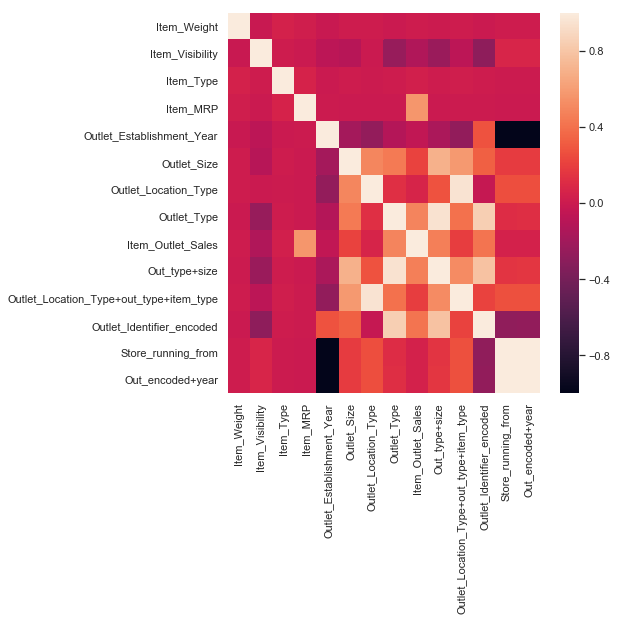

In [67]:
plt.figure(figsize = (7,7))
sns.heatmap(df1.corr())

#### corr(method = spearman)

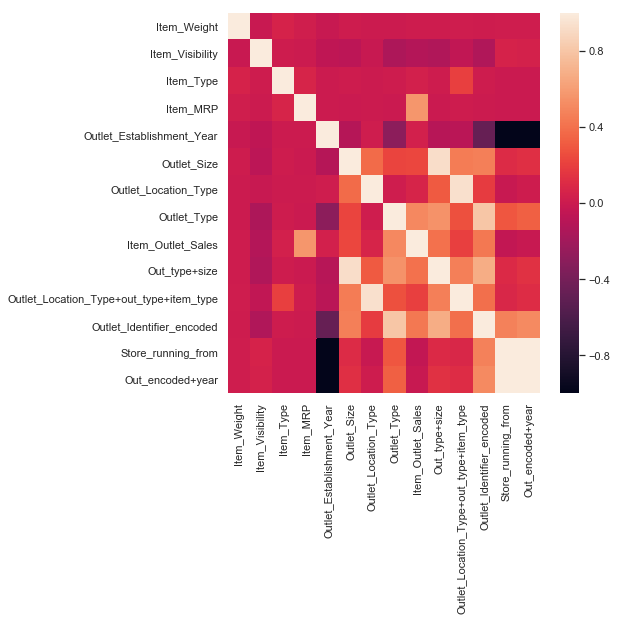

In [69]:
plt.figure(figsize = (7,7))
sns.heatmap(df1.corr(method = 'spearman'))

## After stastical and domain based hypothesis testing, encoding, Feature selection and model selection and hyper peramter tuning which are not in it.....
tryed models are Linear regression, Ridge, D.T., RandomForest, GB boosting

In [72]:
x = df1[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier_encoded','Item_Type','Item_Visibility']]
y = df1['Item_Outlet_Sales']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

model = RandomForestRegressor(random_state = 42, criterion = 'mse', max_depth = 6, min_samples_leaf = 10,
                              max_features = 'auto', n_estimators = 80)

model.fit(x_train, y_train)
pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(model.feature_importances_)
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.6173266519873647
0.6173446338863918
[0.55002031 0.22828177 0.20867892 0.00452282 0.00849619]
1019.8263729317113
